In [1]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

## Confidence Intervals

In a previous coin-flipping discussion, we discussed estimation of the
underlying probability of getting a heads. There, we derived the
estimator as

$$
\hat{p}_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

 where $X_i\in \lbrace 0,1 \rbrace$. Confidence intervals allow us to
estimate how close we can get to the true value that we are estimating.
Logically, that seems strange, doesn't it? We really don't know the exact value
of what we are estimating (otherwise, why estimate it?), and yet, somehow we
know how close we can get to something we admit we don't know? Ultimately, we
want to make statements like the *probability of the value in a certain
interval is 90\%*. Unfortunately, that is something we will not be able to say
using our methods. Note that Bayesian estimation gets closer to this statement
by using *credible intervals*, but that is a story for another day. In our
situation, the best we can do is say roughly the following: *if we ran the
experiment multiple times, then the confidence interval would trap the true
parameter 90\% of the time*.

Let's return to our coin-flipping example and see this in action. One
way to get at a confidence interval is to use Hoeffding's inequality
from the section ref{ch:prob:sec:ineq}
specialized to our Bernoulli variables as

$$
\mathbb{P}(\mid \hat{p}_n-p\mid >\epsilon) \leq 2 \exp(-2n \epsilon^2)
$$

 Now, we can form the interval
$\mathbb{I}=[\hat{p}_n-\epsilon_n,\hat{p}_n+\epsilon_n]$, where $\epsilon_n$ is
carefully constructed as

$$
\epsilon_n = \sqrt{ \frac{1}{2 n}\log\frac{2}{\alpha}}
$$

 which makes the right-side of the Hoeffding inequality equal to
$\alpha$. Thus, we finally have

$$
\mathbb{P}(p \notin \mathbb{I}) = \mathbb{P}\left(\mid \hat{p}_n-p\mid >\epsilon_n\right) \leq \alpha
$$

Thus, $ \mathbb{P}(p \in \mathbb{I})
\geq 1-\alpha$. As a numerical example, let's take $n=100$, $\alpha=0.05$, then plugging into everything we have gives $\epsilon_n=0.136$.
So, the 95\% confidence interval here is therefore

$$
\mathbb{I}=[\hat{p}_n-\epsilon_n,\hat{p}_n+\epsilon_n] = [\hat{p}_n-0.136,\hat{p}_n+0.136]
$$

The following code sample is a simulation to see if we can really trap
the underlying parameter in our confidence interval.

In [ ]:
np.reshape()

In [8]:
b.rvs(nsamples * 200).reshape(100,-1)

array([[0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0]])

In [10]:
b = stats.bernoulli(.5)  # fair coin distribution
nsamples = 100

# flip it nsamples times for 200 estimates
xs = b.rvs(nsamples * 200).reshape(nsamples, -1)
#One shape dimension can be -1. In this case, the value is 
#inferred from the length of the array and remaining dimensions.


phat = np.mean(xs, axis=0)  # estimated p

# edge of 95% confidence interval
epsilon_n = np.sqrt(np.log(2/0.05)/(2*nsamples))
pct = np.logical_and(phat - epsilon_n <= 0.5, 
                     0.5 <=(epsilon_n + phat)).mean() * 100

print('Interval trapped correct value ', pct, '% of the time')

Interval trapped correct value  99.0 % of the time


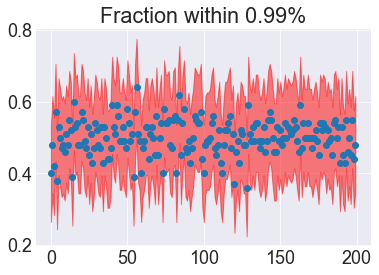

In [31]:
plt.figure(figsize=(6,4))
plt.plot(phat,'o')
plt.fill_between(np.arange(200),
                 phat+epsilon_n,
                 phat-epsilon_n,
                 color='red',
                 alpha=0.5)
plt.title(f'Fraction within {pct/100}%');

<!-- # @@@CODE src-statistics/Confidence_Intervals.py fromto: from scipy@#end -->

 The result shows that the estimator and the corresponding
interval was able to trap the true value at least 95\% of the time. This is how
to interpret the action of confidence intervals.

However, the usual practice is to not use Hoeffding's inequality and
instead use arguments around asymptotic normality.
The definition of the standard error is the following:

$$
\texttt{se} = \sqrt{\mathbb{V}(\hat{\theta}_n)}
$$

 where $\hat{\theta}_n$ is the point-estimator for the parameter
$\theta$, given $n$ samples of data $X_n$, and $\mathbb{V}(\hat{\theta}_n)$ is
the variance of $\hat{\theta}_n$. Likewise, the estimated standard error is
$\widehat{\texttt{se}}$. For example, in our coin-flipping example, the estimator
was $\hat{p}=\sum X_i/n$ with corresponding variance
$\mathbb{V}(\hat{p}_n)=p(1-p)/n$.  Plugging in the point estimate gives us the
estimated standard error: $\widehat{\texttt{se}}=\sqrt{\hat{p}(1-\hat{p})/n}$.
Because maximum likelihood estimators are asymptotically normal [^mle], we know
that $\hat{p}_n \sim \mathcal{N}(p,\widehat{\texttt{se}}^2)$. Thus, if we want
a $1-\alpha$ confidence interval, we can compute

[^mle]: Certain technical regularity conditions must hold for this property
of maximum likelihood estimator to work. See 
[[wasserman2004all]](#wasserman2004all) for more details.

$$
\mathbb{P}(\mid \hat{p}_n-p\mid  < \xi)> 1-\alpha
$$

 but since we know that $ (\hat{p}_n-p)$ is asymptotically normal,
$\mathcal{N}(0,\widehat{\texttt{se}}^2)$, we can instead compute

$$
\int_{-\xi}^{\xi} \mathcal{N}(0,\widehat{\texttt{se}}^2) dx > 1-\alpha
$$

 This looks ugly to compute because we need to find $\xi$, but
Scipy has everything we need for this.

In [34]:
xs.shape[0]

100

In [36]:
rv.interval(0.95)

(-0.09601823352710619, 0.09601823352710619)

In [37]:
# compute estimated se for all trials
se = np.sqrt(phat * (1 - phat) / nsamples)

# generate random variable for trial 0
rv = stats.norm(0, se[0])

# compute 95% confidence interval for that trial 0
print(np.array(rv.interval(0.95)) + phat[0])

[0.30398177 0.49601823]


In [53]:
confs = np.vstack([stats.norm.interval(0.95,loc=0, scale=se_)+phat_ for se_,phat_ in zip(se,phat)])

In [55]:
confs[:10]

array([[0.30398177, 0.49601823],
       [0.38208023, 0.57791977],
       [0.32326431, 0.51673569],
       [0.47296694, 0.66703306],
       [0.28486601, 0.47513399],
       [0.43217836, 0.62782164],
       [0.4020018 , 0.5979982 ],
       [0.37217836, 0.56782164],
       [0.38208023, 0.57791977],
       [0.3623159 , 0.5576841 ]])

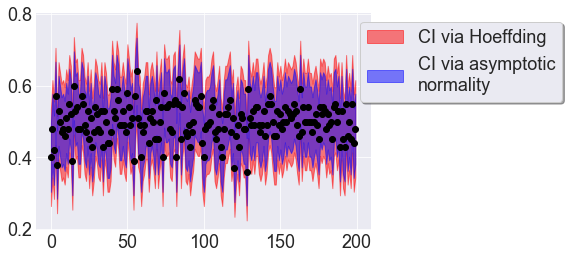

In [63]:
plt.figure(figsize=(6,4))
plt.plot(phat,'o',color='k')
plt.fill_between(np.arange(200),
                 phat+epsilon_n,
                 phat-epsilon_n,
                 color='red',
                 alpha=0.5,
                 label='CI via Hoeffding')

plt.fill_between(np.arange(200),
                 confs.T[0],
                 confs.T[1],
                 color='blue',
                 alpha=0.5,
                 label='CI via asymptotic\nnormality')

plt.legend(bbox_to_anchor=(1.6,1),fancybox=True,shadow=True,frameon=True)

<!-- # @@@CODE src-statistics/Confidence_Intervals.py fromto: ^# compute estimated se for all trials@^#end -->

<!-- dom:FIGURE: [fig-statistics/Confidence_Intervals_001.png, width=500 frac=0.75] The gray circles are the point estimates that are bounded above and below by both asymptotic confidence intervals and Hoeffding intervals. The asymptotic intervals are tighter because the underpinning asymptotic assumptions are valid for these estimates.  <div id="fig:Confidence_Intervals_001"></div> -->
<!-- begin figure -->
<div id="fig:Confidence_Intervals_001"></div>

<p>The gray circles are the point estimates that are bounded above and below by both asymptotic confidence intervals and Hoeffding intervals. The asymptotic intervals are tighter because the underpinning asymptotic assumptions are valid for these estimates.</p>
<img src="fig-statistics/Confidence_Intervals_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Confidence_Intervals_001) shows the asymptotic
confidence intervals and the Hoeffding-derived confidence intervals.
As shown, the Hoeffding intervals are a bit more generous than the
asymptotic estimates.  However, this is only true so long as the
asympotic approximation is valid. In other words, there exists some
number of $n$ samples for which the asymptotic intervals may not work.
So, even though they may be a bit more generous, the Hoeffding
intervals do not require arguments about asymptotic convergence. In
practice, nonetheless, asymptotic convergence is always in play (even
if not explicitly stated).

### Confidence Intervals and Hypothesis testing

It turns out that there is a close dual relationship between hypothesis testing
and confidence intervals. To see this in action, consider the following
hypothesis test for a normal distribution, $H_0 :\mu=\mu_0$ versus $H_1: \mu
\neq \mu_0$. A reasonable test has the following rejection region:

$$
\left\{ x: \mid \bar{x}-\mu_0\mid  > z_{\alpha/2}\frac{\sigma}{\sqrt n} \right\}
$$

 where $\mathbb{P}(Z > z_{\alpha/2}) = \alpha/2$ and
$\mathbb{P}(-z_{\alpha/2}< Z < z_{\alpha/2}) = 1-\alpha$ and where $Z \sim
\mathcal{N}(0,1)$. This is the same thing as saying that the region
corresponding to acceptance of $H_0$ is then,

<!-- Equation labels as ordinary links -->
<div id="eq:ci"></div>

$$
\begin{equation}
\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n}  \leq \mu_0 \leq \bar{x} +z_{\alpha/2}\frac{\sigma}{\sqrt n} 
\end{equation}
\label{eq:ci} \tag{1}
$$

 Because the test has size $\alpha$, the false alarm probability, $\mathbb{P}(H_0 
\texttt{  rejected}\mid \mu=\mu_0)=\alpha$.  Likewise, the $\mathbb{P}(H_0 
\texttt{  accepted}\mid \mu=\mu_0)=1-\alpha$. Putting this all together with
interval defined above means that

$$
\mathbb{P}\left(\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n} \leq \mu_0 \leq \bar{x}+z_{\alpha/2}\frac{\sigma}{\sqrt n} \Big\vert H_0\right)=1-\alpha
$$

 Because this is valid for any $\mu_0$, we can drop the $H_0$ condition
and say the following:

$$
\mathbb{P}\left(\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n}  \leq \mu_0 \leq \bar{x} +z_{\alpha/2}\frac{\sigma}{\sqrt n} \right) =1-\alpha
$$

As may be obvious by now, the interval in Equation ref{eq:ci} above *is* the
$1-\alpha$ confidence interval! Thus, we have just obtained the confidence
interval by inverting the acceptance region of the level $\alpha$ test. The
hypothesis test fixes the *parameter* and then asks what sample values
(i.e., the acceptance region) are consistent with that fixed value.
Alternatively, the confidence interval fixes the sample value and then asks
what parameter values (i.e., the confidence interval) make this sample value
most plausible. Note that sometimes this inversion method results in disjoint
intervals (known as *confidence sets*).

## Linear Regression

<!-- TODO subset selection -->

Linear regression gets to the heart of statistics: Given a set of data points,
what is the relationship of the data in-hand to data yet seen? 
How should information from one data set propagate to other data? Linear
regression offers the following model to address this question:

$$
\mathbb{E}(Y|X=x) \approx a x + b
$$

 That is, given specific values for $X$, assume that the conditional
expectation is a linear function of those specific values.  However, because
the observed values are not the expectations themselves, the model accommodates
this with an additive noise term. In other words, the observed variable (a.k.a.
response, target, dependent variable) is modeled as,

$$
\mathbb{E}(Y| X=x_i) + \epsilon_i \approx a x + b+ \epsilon_i=y
$$

 where $\mathbb{E}(\epsilon_i)=0$ and the $\epsilon_i$ are iid and
where the distribution function of $\epsilon_i$ depends on the problem, even
though it is often assumed Gaussian. The $X=x$ values are known as independent
variables, covariates, or regressors. 

Let's see if we can use all of the methods we have developed so far to
understand this form of regression. The first task is to determine how to
estimate the unknown linear parameters, $a$ and $b$. To make this concrete,
let's assume that $\epsilon \sim \mathcal{N}(0,\sigma^2)$.  Bear in mind that
$\mathbb{E}(Y|X=x)$ is a deterministic function of $x$.  In other words, the
variable $x$ changes with each draw, but after the data have been collected
these are no longer random quantities. Thus, for fixed $x$, $y$ is a random
variable generated by $\epsilon$.  Perhaps we should denote $\epsilon$ as
$\epsilon_x$ to emphasize this, but because $\epsilon$ is an independent,
identically-distributed (iid) random variable at each fixed $x$, this would be
excessive.  Because of Gaussian additive noise, the
distribution of $y$ is completely characterized by its mean and variance.

$$
\mathbb{E}(y) = a x  + b
$$

$$
\
\mathbb{V}(y) = \sigma^2
$$

 Using the maximum likelihood procedure, we write
out the log-likelihood  function as

$$
\mathcal{L}(a,b)  = \sum_{i=1}^n \log \mathcal{N}(a x_i +b , \sigma^2) \propto \frac{1}{2 \sigma^2}\sum_{i=1}^n (y_i-a x_i-b)^2
$$

 Note that we suppressed  the terms that are irrelevent to
the maximum-finding. Taking the derivative of this with respect to $a$ gives
the following equation:

$$
\frac{\partial \mathcal{L}(a,b)}{\partial a}= 2 \sum_{i=1}^n x_i (b+ a x_i -y_i) =0
$$

 Likewise, we do the same for the $b$ parameter

$$
\frac{\partial \mathcal{L}(a,b)}{\partial b}=2\sum_{i=1}^n (b+a x_i-y_i) =0
$$

 The following code simulates some data and uses Numpy tools to
compute the parameters as shown,

In [215]:
a = 6
b = 1  # parameters to estimate

x = np.linspace(0, 1, 100)
y = a * x + np.random.randn(len(x)) + b # y ~ 6*x+1

p, var_ = np.polyfit(x, y, 1, cov=True)  # fit data to line

y_ = np.polyval(p, x)  # estimated by linear regression

In [72]:
var_

array([[ 0.10177124, -0.05088562],
       [-0.05088562,  0.03409508]])

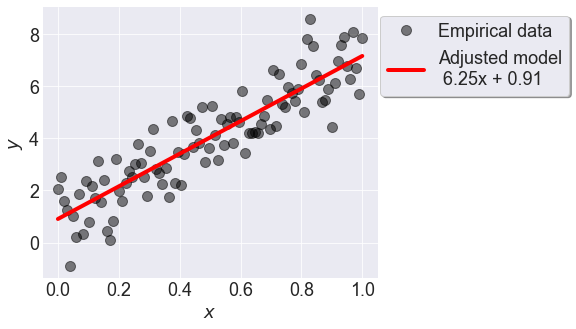

In [102]:
plt.figure(figsize=(6,5))
plt.plot(x,y,'o',color='k',ms=10, alpha=0.5, label='Empirical data')
plt.plot(x,y_,'-',color='red', 
         label=f'Adjusted model\n {p[0]:.2f}x + {p[1]:.2f}',
         linewidth=4)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.legend(bbox_to_anchor=(1.6,1),fancybox=True,shadow=True,frameon=True)

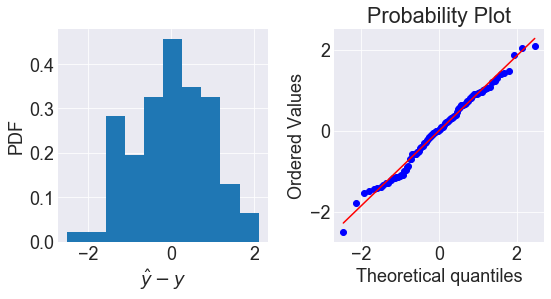

In [98]:
f, ax = plt.subplots(1,2,figsize=(8,4.5))

ax[0].hist(y_-y,density=True)
ax[0].set_xlabel(r'$\hat{y}-y$')
ax[0].set_ylabel(r'PDF')

stats.probplot(y_-y,plot=ax[1]);
f.tight_layout()

<!-- @@@CODE src-statistics/Regression.py fromto: ^a@^# draw -->

<!-- dom:FIGURE: [fig-statistics/Regression_001.png, width=500 frac=1.] The panel on the left shows the data and regression line. The panel on the right shows a histogram of the regression errors. <div id="fig:Regression_001"></div> -->
<!-- begin figure -->
<div id="fig:Regression_001"></div>

<p>The panel on the left shows the data and regression line. The panel on the right shows a histogram of the regression errors.</p>
<img src="fig-statistics/Regression_001.png" width=500>

<!-- end figure -->


 The graph on the left of [Figure](#fig:Regression_001)
shows the regression line plotted against the data. The estimated
parameters are noted in the title.  The histogram on the right of
[Figure](#fig:Regression_001) shows the residual errors in the model.
It is always a good idea to inspect the residuals of any regression
for normality. These are the differences between the fitted line for
each $x_i$ value and the corresponding $y_i$ value in the data.
Note that the $x$ term does not have to be uniformly monotone.

To decouple the deterministic variation from the random variation, we can fix
the index and write separate problems of the form

$$
y_i = a x_i +b + \epsilon_i
$$

 where $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$. What could we do with
just this one component of the problem? In other words, suppose we had
$m$-samples of this component as in $\lbrace y_{i,k}\rbrace_{k=1}^m$. Following
the usual procedure, we could obtain estimates of the mean of $y_i$ as

$$
\hat{y_i} = \frac{1}{m}\sum_{k=1}^m y_{i,k}
$$

 However, this tells us nothing about the individual parameters $a$
and $b$ because they are not separable in the terms that are computed, namely,
we may have

$$
\mathbb{E}(y_i) = a x_i +b
$$

 but we still only have one equation and the two unknowns, $a$ and
$b$. How about if we consider and fix another component $j$ as in

$$
y_j = a x_j +b + \epsilon_i
$$

 Then, we have

$$
\mathbb{E}(y_j) = a x_j +b
$$

 so at least now we have two equations and two unknowns and we know how to
estimate the left hand sides of these equations from the data using the
estimators $\hat{y_i}$ and  $\hat{y_j}$. Let's see how this works in the code
sample below.

In [137]:
x0, xn = x[0], x[80]
# generate synthetic data
y_0 = a * x0 + np.random.randn(20) + b
y_1 = a * xn + np.random.randn(20) + b

# mean along sample dimension
yhat = np.array([y_0, y_1]).mean(axis=1)

a_, b_ = np.linalg.solve(np.array([[x0, 1], [xn, 1]]), yhat)

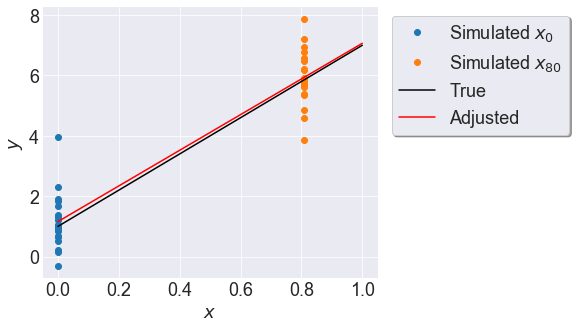

In [138]:
plt.figure(figsize=(6,5))

plt.plot(20*[x0],y_0,'o',label='Simulated $x_0$')
plt.plot(20*[xn],y_1,'o',label='Simulated $x_{80}$')
plt.plot(x,x*a+b,'-',color='k',label='True')
plt.plot(x,x*a_+b_,'-',color='red',label='Adjusted')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.legend(bbox_to_anchor=(1.6,1),fancybox=True,shadow=True,frameon=True)

<!-- dom:FIGURE: [fig-statistics/Regression_002.png, width=500 frac=0.95] The fitted and true lines are plotted with the data values. The squares at either end of the solid line show the mean value for each of the data groups shown. <div id="fig:Regression_002"></div> -->
<!-- begin figure -->
<div id="fig:Regression_002"></div>

<p>The fitted and true lines are plotted with the data values. The squares at either end of the solid line show the mean value for each of the data groups shown.</p>
<img src="fig-statistics/Regression_002.png" width=500>

<!-- end figure -->


**Programming Tip.**

The prior code uses the `solve` function in the Numpy `linalg` module, which
contains the core linear algebra codes in Numpy that incorporate the
battle-tested LAPACK library.



 We can write out the solution for the estimated parameters for this
case where $x_0 =0$

$$
\hat{a} = \frac{\hat{y}_i - \hat{y}_0}{x_i}
$$

$$
\
\hat{b} = \hat{y_0}
$$

$$
\
$$

 The expectations and variances of these estimators are the following,

$$
\mathbb{E}(\hat{a}) = \frac{a x_i }{x_i}=a
$$

$$
\
\mathbb{E}(\hat{b}) =b
$$

$$
\
\mathbb{V}(\hat{a}) = \frac{2 \sigma^2}{x_i^2}
$$

$$
\
\mathbb{V}(\hat{b}) = \sigma^2
$$

 The expectations show that the estimators are unbiased.  The
estimator  $\hat{a}$ has a variance that decreases as larger points $x_i$ are
selected. That is, it is better to have samples further out along the
horizontal axis for fitting the line.  This variance quantifies the *leverage*
of those distant points.

**Regression From Projection Methods.** Let's see if we can apply our knowledge
of projection methods to the general case.  In vector notation, we can write
the following:

$$
\mathbf{y} = a \mathbf{x} + b\mathbf{1} + \boldsymbol{\epsilon}
$$

 where $\mathbf{1}$ is the vector of all ones. 
Let's use the inner-product notation,

$$
\langle \mathbf{x},\mathbf{y} \rangle = \mathbb{E}(\mathbf{x}^T \mathbf{y})
$$

 Then, by taking the inner-product with some $\mathbf{x}_1 \in
\mathbf{1}^\perp$ we obtain [^perp],

[^perp]: The space of all vectors, $\mathbf{a}$ such that $\langle
\mathbf{a},\mathbf{1} \rangle = 0$ is denoted $\mathbf{1}^\perp$.

$$
\langle \mathbf{y},\mathbf{x}_1  \rangle = a \langle \mathbf{x},\mathbf{x}_1 \rangle
$$

 Recall that $\mathbb{E}(\boldsymbol{\epsilon})=\mathbf{0}$.  We
can finally solve for $a$ as

<!-- Equation labels as ordinary links -->
<div id="eq:ahat"></div>

$$
\begin{equation}
\hat{a} = \frac{\langle\mathbf{y},\mathbf{x}_1 \rangle}{\langle \mathbf{x},\mathbf{x}_1 \rangle} 
\end{equation}
\label{eq:ahat} \tag{1}
$$

 That was pretty neat but now we have the mysterious $\mathbf{x}_1$
vector.  Where does this come from?  If we project $\mathbf{x}$ onto the
$\mathbf{1}^\perp$, then we get the MMSE  approximation to $\mathbf{x}$ in the
$\mathbf{1}^\perp$ space. Thus, we take

$$
\mathbf{x}_1 = P_{\mathbf{1}^\perp} (\mathbf{x})
$$

 Remember that $P_{\mathbf{1}^\perp} $ is a projection matrix so the length of
$\mathbf{x}_1$ is at most $\mathbf{x}$. This means that the denominator in
the $\hat{a}$ equation above is really just the length of the $\mathbf{x}$
vector in the coordinate system of $P_{\mathbf{1}^\perp} $. Because the
projection is orthogonal (namely, of minimum length), the Pythagorean theorem
gives this length as the following:

$$
\langle \mathbf{x},\mathbf{x}_1 \rangle ^2=\langle \mathbf{x},\mathbf{x} \rangle- \langle\mathbf{1},\mathbf{x} \rangle^2
$$

 The first term on the right is the length of the $\mathbf{x}$ vector
and last term is the length of $\mathbf{x}$ in the coordinate system orthogonal
to $P_{\mathbf{1}^\perp} $, namely that of $\mathbf{1}$.  We
can use this geometric interpretation to understand what is going on in
typical linear regression in much more detail. The fact that the denominator is
the orthogonal projection of $\mathbf{x}$ tells us that the choice of
$\mathbf{x}_1$ has the strongest effect (i.e., largest value) on reducing
the variance of $\hat{a}$. That is, the more $\mathbf{x}$ is aligned with
$\mathbf{1}$, the worse the variance of $\hat{a}$. This makes intuitive sense
because the closer $\mathbf{x}$ is to $\mathbf{1}$, the more constant it is,
and we have already seen from our one-dimensional example that distance between
the $x$ terms pays off in reduced variance. We already know that $\hat{a}$
is an unbiased estimator and because we chose $\mathbf{x}_1$ deliberately as a
projection, we know that it is also of minimum variance. Such estimators are
known as Minimum-Variance Unbiased Estimators (MVUE).

In the same spirit, let's examine the numerator of $\hat{a}$ in Equation ref{eq:ahat}. We can write
$\mathbf{x}_{1}$ as the following

$$
\mathbf{x}_{1} = \mathbf{x} -  P_{\mathbf{1}} \mathbf{x}
$$

 where $P_{\mathbf{1}}$ is projection matrix  of $\mathbf{x}$ onto the
$\mathbf{1}$ vector. Using this, the numerator of $\hat{a}$ becomes

$$
\langle \mathbf{y}, \mathbf{x}_1\rangle  =\langle \mathbf{y}, \mathbf{x}\rangle -\langle \mathbf{y}, P_{\mathbf{1}} \mathbf{x}\rangle
$$

 Note that,

$$
P_{\mathbf{1}}  = \mathbf{1} \mathbf{1}^T \frac{1}{n}
$$

 so that writing this out explicitly gives

$$
\langle \mathbf{y}, P_{\mathbf{1}} \mathbf{x}\rangle = \left(\mathbf{y}^T \mathbf{1}\right) \left(\mathbf{1}^T \mathbf{x}\right)/n =\left(\sum y_i\right)\left(\sum x_{i}\right)/n
$$

 and similarly, we have the following for the denominator:

$$
\langle \mathbf{x}, P_{\mathbf{1}} \mathbf{x}\rangle = \left(\mathbf{x}^T \mathbf{1}\right) \left(\mathbf{1}^T \mathbf{x}\right)/n =\left(\sum x_i\right)\left(\sum x_{i}\right)/n
$$

 So, plugging all of this together gives the following,

$$
\hat{a} = \frac{\mathbf{x}^T\mathbf{y}-(\sum x_i)(\sum y_i)/n}{\mathbf{x}^T \mathbf{x}  -(\sum x_i)^2/n}
$$

 with corresponding variance,

$$
\mathbb{V}(\hat{a}) = \sigma^2 \frac{\|\mathbf{x}_1\|^2}{\langle\mathbf{x},\mathbf{x}_1\rangle^2}
$$

$$
\
                    = \frac{\sigma^2}{\Vert \mathbf{x}\Vert^2-n(\overline{x}^2)}
$$

 Using the same approach with $\hat{b}$ gives,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\hat{b}  = \frac{\langle \mathbf{y},\mathbf{x}^{\perp} \rangle}{\langle \mathbf{1},\mathbf{x}^{\perp}\rangle} 
\label{_auto1} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
         = \frac{\langle \mathbf{y},\mathbf{1}-P_{\mathbf{x}}(\mathbf{1})\rangle}{\langle \mathbf{1},\mathbf{1}-P_{\mathbf{x}}(\mathbf{1})\rangle} 
\label{_auto2} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} \
         = \frac{\mathbf{x}^T \mathbf{x}(\sum y_i)/n -\mathbf{x}^T\mathbf{y}(\sum x_i)/n}{\mathbf{x}^T \mathbf{x} -(\sum x_i)^2/n} 
\label{_auto3} \tag{4}
\end{equation}
$$

 where

$$
P_{\mathbf{x}} = \frac{\mathbf{\mathbf{x} \mathbf{x}^T}}{\| \mathbf{x} \|^2}
$$

 with variance

$$
\mathbb{V}(\hat{b})=\sigma^2 \frac{\langle \boldsymbol{\mathbf{1}-P_{\mathbf{x}}(\mathbf{1})},\boldsymbol{\mathbf{1}-P_{\mathbf{x}}(\mathbf{1})}\rangle}{\langle \mathbf{1},\boldsymbol{\mathbf{1}-P_{\mathbf{x}}(\mathbf{1})}\rangle^2}
$$

$$
\
                   =\frac{\sigma^2}{n-\frac{(n\overline{x})^2}{\Vert\mathbf{x}\Vert^2}}
$$

**Qualifying the Estimates.** Our formulas for the variance above include the
unknown $\sigma^2$, which we must estimate from the data itself using our
plug-in estimates.  We can form the residual sum of squares as

$$
\texttt{RSS} = \sum_i (\hat{a} x_i + \hat{b} - y_i)^2
$$

 Thus, the estimate of $\sigma^2$ can be expressed as

$$
\hat{\sigma}^2 = \frac{\texttt{RSS}}{n-2}
$$

 where $n$ is the number of samples. This is also known as the
*residual mean square*. The $n-2$  represents the *degrees of freedom* (`df`).
Because we estimated two parameters from the same data we have $n-2$ instead of
$n$. Thus, in general, $\texttt{df} = n - p$, where $p$ is the number of
estimated parameters.  Under the assumption that the noise is Gaussian,  the
$\texttt{RSS}/\sigma^2$ is chi-squared distributed with $n-2$ degrees of
freedom. Another important term is the *sum of squares about the mean*, (a.k.a
*corrected* sum of squares),

$$
\texttt{SYY} = \sum (y_i - \bar{y})^2
$$

 The $\texttt{SYY}$ captures the idea of not using the $x_i$ data and
just using the mean of the $y_i$ data to estimate $y$. These two terms lead
to the $R^2$ term,

$$
R^2=1-\frac{\texttt{RSS}}{ \texttt{SYY} }
$$

 Note that for perfect regression, $R^2=1$.  That is, if the
regression gets each $y_i$ data point exactly right, then
$\texttt{RSS}=0$ this term equals one.  Thus, this term is used to
measure of goodness-of-fit. The `stats` module in `scipy` computes
many of these terms automatically,

```python
stats.linregress(x, y)

Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.
```

In [140]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

(slope, intercept, r_value, p_value, stderr)

(6.252555599231139,
 0.9065084923448588,
 0.8944599014162138,
 4.975333616518829e-36,
 0.31574399882090814)

 where the square of the `r_value` variable is the $R^2$ above. The
computed p-value is the two-sided hypothesis test with a null hypothesis that
the slope of the line is zero. In other words, this tests whether or not the
linear regression  makes sense for the data for that hypothesis.  The
Statsmodels module provides a powerful extension to Scipy's stats module by
making it easy to do regression and keep track of these parameters. Let's
reformulate our problem using the Statsmodels framework by creating
a Pandas dataframe for the data,

In [147]:
import statsmodels.formula.api as smf

d = pd.DataFrame({'x':np.linspace(0,1,30)}) # create data
d['y'] = a*d.x+ b + np.random.randn(*d.x.shape)

In [148]:
d

,x,y
0,0.000000,1.860473
1,0.034483,3.915602
2,0.068966,0.312670
3,0.103448,1.447353
4,0.137931,0.062987
...,...,...
25,0.862069,6.671125
26,0.896552,8.172672
27,0.931034,7.204027
28,0.965517,6.791268


<!-- ** -->

 Now that we have  the input data in the above
Pandas dataframe, we can perform the regression as in the following,

In [149]:
results = smf.ols('y ~ x', data=d).fit()

 The $\sim$ symbol is notation for $y = a x + b + \epsilon$, where the
constant $b$ is implicit in this usage of Statsmodels. The names in the string
are taken from the columns in the dataframe. This makes it very easy to build
models with complicated interactions between the named columns in the
dataframe. We can examine a report of the model fit by looking at the summary,

In [151]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           6.75e-11
Time:                        09:22:12   Log-Likelihood:                -43.271
No. Observations:                  30   AIC:                             90.54
Df Residuals:                      28   BIC:                             93.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8986      0.377      2.381      0.024       0.125       1.672
x              6.5867      0.648     10.162      0.000       5.259       7.914
==============================================================================
Omnibus:                        3.014   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                1.949
Skew:                           0.613   Prob(JB):                        0.377
Kurtosis:                       3.235   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.779   
Dependent Variable: y                AIC:                90.5415 
Date:               2018-10-17 09:22 BIC:                93.3439 
No. Observations:   30               Log-Likelihood:     -43.271 
Df Model:           1                F-statistic:        103.3   
Df Residuals:       28               Prob (F-statistic): 6.75e-11
R-squared:          0.787            Scale:              1.1228  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.8986     0.3774    2.3808   0.0243   0.1255   1.6718
x            6.5867     0.6482   10.1617   0.0000   5.2589   7.9144
-----------------------------------------------------------------
Omnibus:              3.014        Durbin-Watson:           2.104
Prob(Omnibus):        0.222        Jarque-Bera (JB):        1.949
Skew:                 0.613        Prob(JB):                0.377
Kurtosis:             3.235        Condition No.:           4    
=================================================================

"""

 There is a lot more here than we have discussed so far, but the
Statsmodels documentation is the best place to go for complete information
about this report. The F-statistic attempts to capture the contrast between
including the slope parameter or leaving it off. That is, consider two
hypotheses:

$$
H_0 \colon  \mathbb{E}(Y|X=x) = b
$$

$$
\
H_1 \colon  \mathbb{E}(Y|X=x) = b + a x
$$

 In order to quantify how much better adding the slope term is for
the regression, we compute  the following:

$$
F = \frac{\texttt{SYY} - \texttt{RSS}}{ \hat{\sigma}^2 }
$$

 The numerator computes the difference in the residual squared errors
between including the slope in the regression or just using the mean of the
$y_i$ values. Once again, if we assume (or can claim asymptotically) that the
$\epsilon$ noise term is Gaussian, $\epsilon \sim \mathcal{N}(0,\sigma^2)$,
then the $H_0$ hypothesis will follow an F-distribution [^fdist] with degrees of
freedom from the numerator and denominator. In this case, $F \sim F(1,n-2)$.
The value of this statistic is reported by Statsmodels above. The corresponding
reported probability shows the chance of $F$ exceeding its computed value  if
$H_0$ were true. So, the take-home message from all this is that including the
slope leads to a much smaller reduction in squared error than could be expected
from a favorable draw of $n$ points of this data, under the Gaussian additive
noise assumption. This is evidence that including the slope is meaningful for
this data.

[^fdist]: The $F(m,n)$ F-distribution has two integer degree-of-freedom parameters, $m$
and $n$.


The Statsmodels report also shows the adjusted $R^2$ term.
This is a correction to the $R^2$ calculation that accounts
for the number of parameters $p$ that the regression is
fitting and the sample size $n$,

$$
\texttt{Adjusted } R^2 = 1- \frac{\texttt{RSS}/(n-p)}{\texttt{SYY}/(n-1)}
$$

 This is always lower than $R^2$ except when $p=1$ (i.e., estimating
only $b$). This becomes a better way to compare regressions when one is
attempting to fit many parameters with comparatively small $n$.

**Linear Prediction.**  Using linear regression for prediction introduces
some other issues. Recall the following expectation,

$$
\mathbb{E}(Y|X=x) \approx \hat{a} x + \hat{b}
$$

 where we have determined $\hat{a}$  and $\hat{b}$  from the data.
Given a new point of interest, $x_p$, we would certainly compute

$$
\hat{y}_p = \hat{a} x_p + \hat{b}
$$

 as the predicted value for $\hat{ y_p }$. This is the same as saying
that our best prediction for $y$ based on $x_p$ is the above conditional
expectation. The variance for this is the following,

$$
\mathbb{V}(y_p) = x_p^2 \mathbb{V}(\hat{a}) +\mathbb{V}(\hat{b})+2 x_p \texttt{cov}(\hat{a}\hat{b})
$$

 Note that we have the covariance above because $\hat{a}$ and
$\hat{b}$ are derived from the same data.  We can work this out below using
our previous notation from ref{eq:ahat},

$$
\texttt{cov}(\hat{a}\hat{b})=\frac{\mathbf{x}_1^T \mathbb{V}\lbrace\mathbf{y}\mathbf{y}^T\rbrace\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})} = \frac{\mathbf{x}_1^T \sigma^2\mathbf{I}\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})}
$$

$$
\
        =\sigma^2\frac{\mathbf{x}_1^T\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})} = \sigma^2\frac{\left(\mathbf{x}-P_1\mathbf{x}\right)^T\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})}
$$

$$
\
        =\sigma^2\frac{-\mathbf{x}^T P_1^T\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})} = \sigma^2\frac{-\mathbf{x}^T\frac{1}{n}\mathbf{1} \mathbf{1}^T\mathbf{x}^{\perp}}{(\mathbf{x}_1^T \mathbf{x})(\mathbf{1}^T \mathbf{x}^{\perp})}
$$

$$
\
        =\sigma^2\frac{-\mathbf{x}^T\frac{1}{n}\mathbf{1}}{(\mathbf{x}_1^T \mathbf{x})} = \frac{-\sigma^2\overline{x}}{\sum_{i=1}^n(x_i^2-\overline{x}^2)}
$$

$$
\
$$

 After plugging all this in, we obtain the following,

$$
\mathbb{V}(y_p)=\sigma^2 \frac{x_p^2-2 x_p\overline{x}+\Vert \mathbf{x}\Vert^2/n}{\Vert\mathbf{x}\Vert^2-n\overline{x}^2}
$$

 where, in practice, we use the plug-in estimate for
the  $\sigma^2$.

There is an important consequence for the confidence interval for
$y_p$. We cannot simply use the square root of $\mathbb{V}(y_p)$
to form the confidence interval because the model includes the
extra $\epsilon$ noise term. In particular, the parameters were
computed using a set of statistics from the data, but now must
include different realizations for the noise term for the
prediction part.  This means we have to compute

$$
\eta^2=\mathbb{V}(y_p)+\sigma^2
$$

 Then, the 95\% confidence interval $y_p \in
(y_p-2\hat{\eta},y_p+2\hat{\eta})$ is the following,

$$
\mathbb{P}(y_p-2\hat{\eta}< y_p < y_p+2\hat{\eta})\approx\mathbb{P}(-2<\mathcal{N}(0,1)<2) \approx 0.95
$$

 where $\hat{\eta}$ comes from substituting the
plug-in estimate for $\sigma$.

## Extensions to Multiple Covariates

With all the machinery we have, it is a short notational hop to consider
multiple regressors as in the following,

$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} +\boldsymbol{\epsilon}
$$

 with the usual $\mathbb{E}(\boldsymbol{\epsilon})=\mathbf{0}$ and
$\mathbb{V}(\boldsymbol{\epsilon})=\sigma^2\mathbf{I}$. Thus, $\mathbf{X}$ is a
$n \times p$ full rank matrix of regressors and $\mathbf{Y}$ is the $n$-vector
of observations. Note that the constant term has been incorporated into
$\mathbf{X}$ as a column of ones.  The corresponding estimated solution for
$\boldsymbol{\beta}$  is the following,

$$
\hat{ \boldsymbol{\beta} } = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$

 with corresponding variance,

$$
\mathbb{V}(\hat{\boldsymbol{\beta}})=\sigma^2(\mathbf{X}^T \mathbf{X})^{-1}
$$

 and with the assumption of Gaussian errors, we have

$$
\hat{\boldsymbol{\beta}}\sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2(\mathbf{X}^T \mathbf{X})^{-1})
$$

 The unbiased estimate of $\sigma^2$ is the following,

$$
\hat{\sigma}^2 = \frac{1}{n-p}\sum \hat{\epsilon}_i^2
$$

 where $\hat{ \boldsymbol{\epsilon}}=\mathbf{X}\hat{\boldsymbol{\beta}} -\mathbf{Y}$ 
is the vector of residuals. Tukey christened the following matrix as the *hat*
matrix (a.k.a. influence matrix),

$$
\mathbf{V}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T
$$

 because it maps $\mathbf{Y}$ into $\hat{ \mathbf{Y} }$,

$$
\hat{ \mathbf{Y} } = \mathbf{V} \mathbf{Y}
$$

 As an exercise you can check that $\mathbf{V}$ is a projection
matrix. Note that that matrix is solely a function of $\mathbf{X}$. The
diagonal elements of $\mathbf{V}$ are called the *leverage values* and are
contained in the closed interval $[1/n,1]$. These terms measure of distance
between the values of $x_i$ and the mean values over the $n$ observations.
Thus, the leverage terms depend only on $\mathbf{X}$. This is the
generalization of our initial discussion of leverage where we had multiple
samples at only two $x_i$ points. Using the hat matrix, we can compute the
variance of each residual, $e_i = \hat{y}-y_i$ as

$$
\mathbb{V}(e_i) = \sigma^2 (1-v_{i})
$$

 where $v_i=V_{i,i}$. Given the above-mentioned bounds on $v_{i}$,
these are always less than $\sigma^2$.

Degeneracy in the columns of $\mathbf{X}$ can become a problem. This is when
two or more of the columns become co-linear. We have already seen this with our
single regressor example wherein $\mathbf{x}$ close to $\mathbf{1}$ was bad
news. To compensate for this effect we can load the diagonal elements and solve
for the unknown parameters as in the following,

$$
\hat{ \boldsymbol{\beta} } = (\mathbf{X}^T \mathbf{X}+\alpha \mathbf{I})^{-1} \mathbf{X}^T \mathbf{Y}
$$

 where $\alpha>0$ is a tunable hyper-parameter. This method is known
as *ridge regression* and was proposed in 1970 by Hoerl and Kenndard. It can be
shown that this is the equivalent to minimizing the following objective,

$$
\Vert \mathbf{Y}- \mathbf{X} \boldsymbol{\beta}\Vert^2  + \alpha \Vert \boldsymbol{\beta}\Vert^2
$$

 In other words, the length of the estimated $\boldsymbol{\beta}$ is
penalized with larger $\alpha$. This has the effect of stabilizing the
subsequent inverse calculation and also providing a means to trade bias and
variance, which we will discuss at length in the section ref{ch:ml:sec:regularization}

**Interpreting Residuals.**  Our model assumes an additive Gaussian noise term.
We can check the voracity of this assumption by examining the residuals after
fitting.  The residuals are the difference between the fitted values and the
original data

$$
\hat{\epsilon}_i = \hat{a} x_i + \hat{b} - y_i
$$

 While the p-value and the F-ratio provide some indication of whether
or not computing the slope of the regression makes sense, we can get directly
at the key assumption of additive Gaussian noise.

For sufficiently small dimensions, the `scipy.stats.probplot` we discussed in
the last chapter provides quick visual evidence one way or another by plotting
the standardized residuals,

$$
r_i = \frac{e_i}{\hat{\sigma}\sqrt{1-v_i}}
$$

 The other part of the iid assumption implies homoscedasticity (all
$r_i$ have equal variances). Under the additive Gaussian noise assumption, the
$e_i$ should also be distributed according to $\mathcal{N}(0,\sigma^2(1-v_i))$.
The normalized residuals $r_i$ should then be distributed according to
$\mathcal{N}(0,1)$. Thus, the presence of any $r_i \notin [-1.96,1.96]$ should
not be common at the 5% significance level and is thereby breeds suspicion
regarding the homoscedasticity assumption.

The Levene test in `scipy.stats.leven` tests the null hypothesis that all the
variances are equal. This basically checks whether or not the standardized
residuals vary across $x_i$ more than expected. Under the homoscedasticity
assumption, the variance should be independent of $x_i$. If not, then this is a
clue that there is a missing variable in the analysis or that the variables
themselves should be transformed (e.g., using the $\log$ function) into another
format that can reduce this effect. Also, we can use weighted least-squares
instead of ordinary least-squares.

**Variable Scaling.** It is tempting to conclude in a multiple
regression that small coefficients in any of the $\boldsymbol{\beta}$ terms
implies that those terms are not important.  However, simple unit conversions
can cause this effect. For example, if one of the regressors is in
units of kilometers and the others are in meters, then just the scale
factor can give the impression of outsized or under-sized effects. The
common way to account for this is to scale the regressors so that

$$
x^\prime = \frac{x-\bar{x}}{\sigma_x}
$$

 This has the side effect of converting the slope parameters
into correlation coefficients, which is bounded by $\pm 1$.

**Influential Data.** We have already discussed the idea
of leverage. The concept of *influence* combines leverage with
outliers. To understand influence, consider [Figure](#fig:Regression_005).

<!-- dom:FIGURE: [fig-statistics/Regression_005.png, width=500 frac=0.65] The point on the right has outsized influence in this data because it is the only one used to determine the slope of the fitted line.  <div id="fig:Regression_005"></div> -->
<!-- begin figure -->
<div id="fig:Regression_005"></div>

<p>The point on the right has outsized influence in this data because it is the only one used to determine the slope of the fitted line.</p>
<img src="fig-statistics/Regression_005.png" width=500>

<!-- end figure -->


The point on the right in [Figure](#fig:Regression_005) is the only one that
is contributing to the calculation of the slope for the fitted line. Thus, it
is very influential in this sense. Cook's distance is a good way to get at this
concept numerically.  To compute this, we have to compute the $j^{th}$
component of the estimated target variable with the $i^{th}$ point deleted. We
call this $\hat{y}_{j(i)}$.  Then, we compute the following,

$$
D_i =\frac{\sum_j (\hat{y}_j- \hat{y}_{j(i)})^2}{p/n \sum_j (\hat{y}_j-y_j)^2}
$$

 where, as before, $p$ is the number of estimated terms (e.g., $p=2$
in the bivariate case). This calculation emphasizes the effect of the outlier
by predicting the target variable with and without each point. In the case of
[Figure](#fig:Regression_005), losing any of the points on the left cannot
change the estimated target variable much, but losing the single point on the
right surely does. The point on the right does not seem to be an outlier (it
*is* on the fitted line), but this is because it is influential enough to
rotate the line to align with it. Cook's distance helps capture this effect by
leaving each sample out and re-fitting the remainder as shown in the last
equation. [Figure](#fig:Regression_006) shows the calculated Cook's
distance for the data in [Figure](#fig:Regression_005), showing that
the data point on the right (sample index `5`) has outsized influence on the fitted line. As a rule
of thumb, Cook's distance values greater than one are suspect.

<!-- dom:FIGURE: [fig-statistics/Regression_006.png, width=500 frac=0.65] The calculated Cook's distance for the data in [Figure](#fig:Regression_005).  <div id="fig:Regression_006"></div> -->
<!-- begin figure -->
<div id="fig:Regression_006"></div>

<p>The calculated Cook's distance for the data in [Figure](#fig:Regression_005).</p>
<img src="fig-statistics/Regression_006.png" width=500>

<!-- end figure -->


As another illustration of influence, consider [Figure](#fig:Regression_007)
which shows some data that nicely line up, but with one outlier (filled black
circle) in the upper panel.  The lower panel shows so-computed Cook's distance
for this data. As shown Cook's distance emphasizes the presence of the outlier.
Because the calculation involves leaving a single sample out and
re-calculating the rest, it can be a time-consuming operation suitable to
relatively small data sets. There is always the temptation to downplay the
importance of outliers because they conflict with a favored model, but
outliers must be carefully examined to understand why the model is unable
to capture them. It could be something as simple as faulty data
collection, or it could be an indication of deeper issues that
have been overlooked. The following code shows how Cook's distance
was compute for [Figure](#fig:Regression_006) and
[Figure](#fig:Regression_007).

In [216]:
def fit(i, x, y):
    return np.polyval(np.polyfit(x, y, 1), i)

def omit(i,x):
    return ([k for j, k in enumerate(x) if j != i])

def cook_d(k):
    num = sum((fit(j, omit(k, x), omit(k, y)) - fit(j, x, y))**2 for j in x)
    den = sum((y - np.polyval(np.polyfit(x, y, 1), x))**2 / len(x) * 2)

    return num / den

In [217]:
cook_distances = [cook_d(i) for i in range(len(x))]

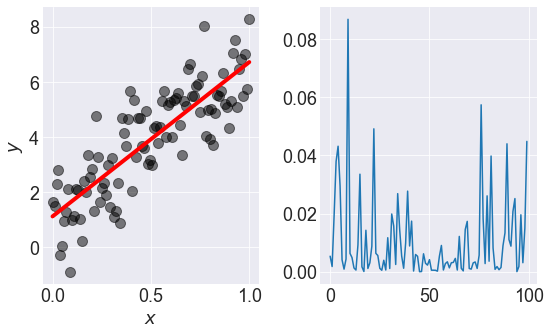

In [218]:
f, ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(x,y,'o',color='k',ms=10, alpha=0.5, label='Empirical data')

ax[0].plot(x,y_,'-',color='red', 
         label=f'Adjusted model\n {p[0]:.2f}x + {p[1]:.2f}',
         linewidth=4)

ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')

ax[1].plot(cook_distances)
f.tight_layout()

In [219]:
y49 = y[49]

In [226]:
y[49] = 4*y49

In [227]:
cook_distances = [cook_d(i) for i in range(len(x))]

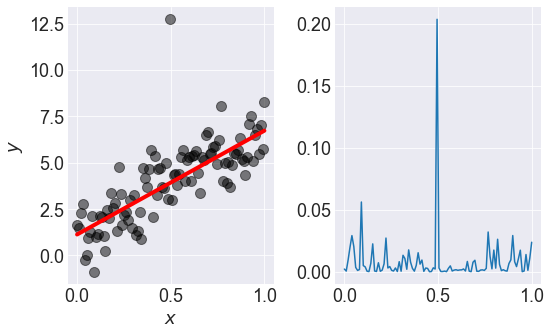

In [228]:
f, ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(x,y,'o',color='k',ms=10, alpha=0.5, label='Empirical data')

ax[0].plot(x,y_,'-',color='red', 
         label=f'Adjusted model\n {p[0]:.2f}x + {p[1]:.2f}',
         linewidth=4)

ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')

ax[1].plot(x,cook_distances)
f.tight_layout()

In [231]:
data = pd.DataFrame()
data['y'] = y
data['x'] = x

In [235]:
fitted = smf.ols('y ~ x', data=data).fit()

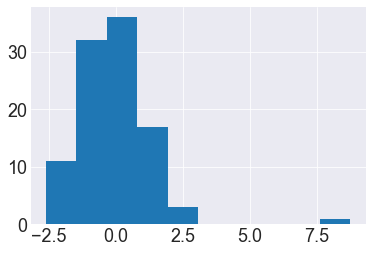

In [256]:
plt.hist(fitted.resid);

In [237]:
influence = fitted.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

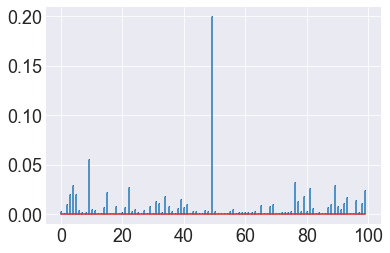

In [246]:
plt.stem(c,markerfmt=",");

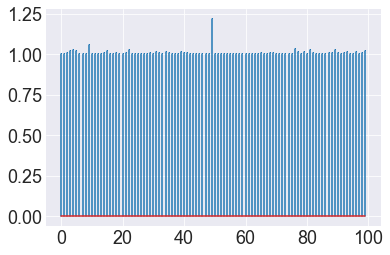

In [249]:
plt.stem(1/p,markerfmt=",");

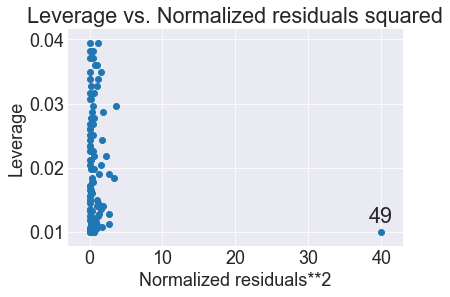

In [260]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted);
#influence_plot(fitted)

**Programming Tip.**

The function `omit` sweeps through the data and excludes
the $i^{th}$ data element. The embedded `enumerate` function
associates every element in the iterable with its corresponding
index.



<!-- dom:FIGURE: [fig-statistics/Regression_007.png, width=500 frac=0.65] The upper panel shows data that fit on a line and an outlier point (filled black circle). The lower panel shows the calculated Cook's distance for the data in upper panel and shows that the tenth point (i.e., the outlier) has disproportionate influence.  <div id="fig:Regression_007"></div> -->
<!-- begin figure -->
<div id="fig:Regression_007"></div>

<p>The upper panel shows data that fit on a line and an outlier point (filled black circle). The lower panel shows the calculated Cook's distance for the data in upper panel and shows that the tenth point (i.e., the outlier) has disproportionate influence.</p>
<img src="fig-statistics/Regression_007.png" width=500>

<!-- end figure -->